Breast Cancer Campaign
Description
An insurance company has decided to start a breast cancer campaign for raising awareness about breast cancer.
They feel that the first step for raising awareness is spreading the word about the facts and the statistics of the disease to the public.
Requirements
In this part of your project, you are required to:
Perform exploratory data analysis on the data from the Wisconsin Breast Cancer dataset.
Visualize the data and show your visualizations.
Preprocess the dataset to be ready for future work.
Note:
Submission of your project on GitHub is optional. If you choose to manage your project using GitHub, find guidelines for using GitHub here. Ensure you are coding using your Jupyter Notebook – it will be uploaded to GitHub when you perform a GIT push operation.

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0       1.097064     -2.073335        1.269934   0.984375         1.568466   
1       1.829821     -0.353632        1.685955   1.908708        -0.826962   
2       1.579888      0.456187        1.566503   1.558884         0.942210   
3      -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4       1.750297     -1.151816        1.776573   1.826229         0.280372   
..           ...           ...             ...        ...              ...   
564     2.110995      0.721473        2.060786   2.343856         1.041842   
565     1.704854      2.085134        1.615931   1.723842         0.102458   
566     0.702284      2.045574        0.672676   0.577953        -0.840484   
567     1.838341      2.336457        1.982524   1.735218         1.525767   
568    -1.808401      1.221792       -1.814389  -1.347789        -3.112085   

     compactness_mean  concavity_mean  concave points_mean  sym

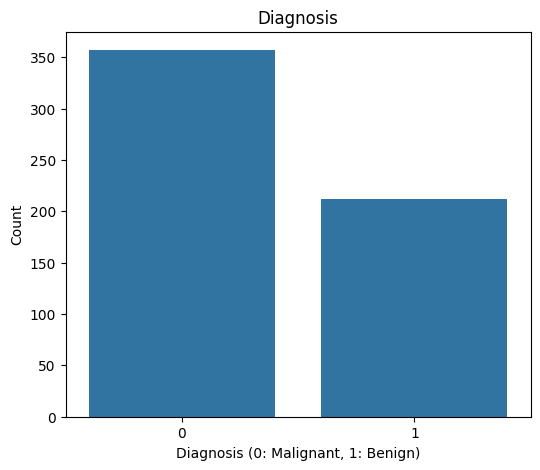

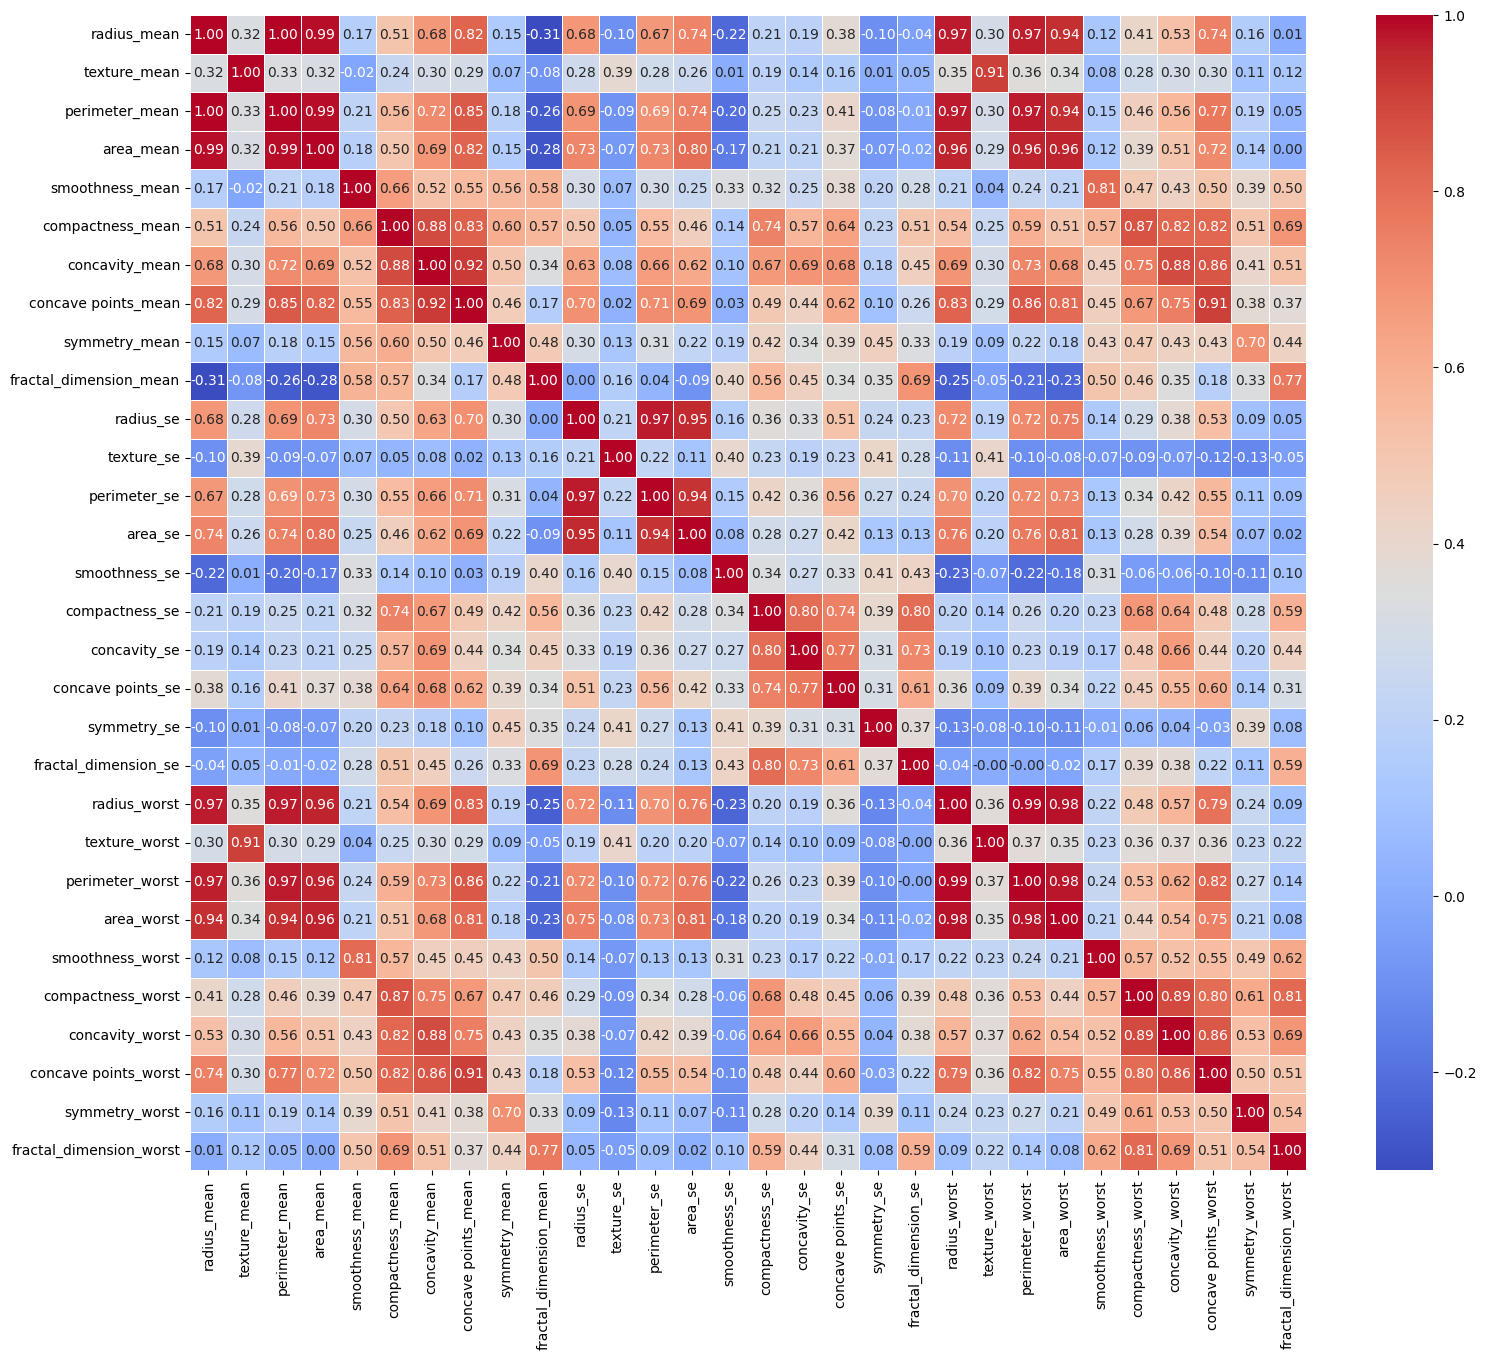

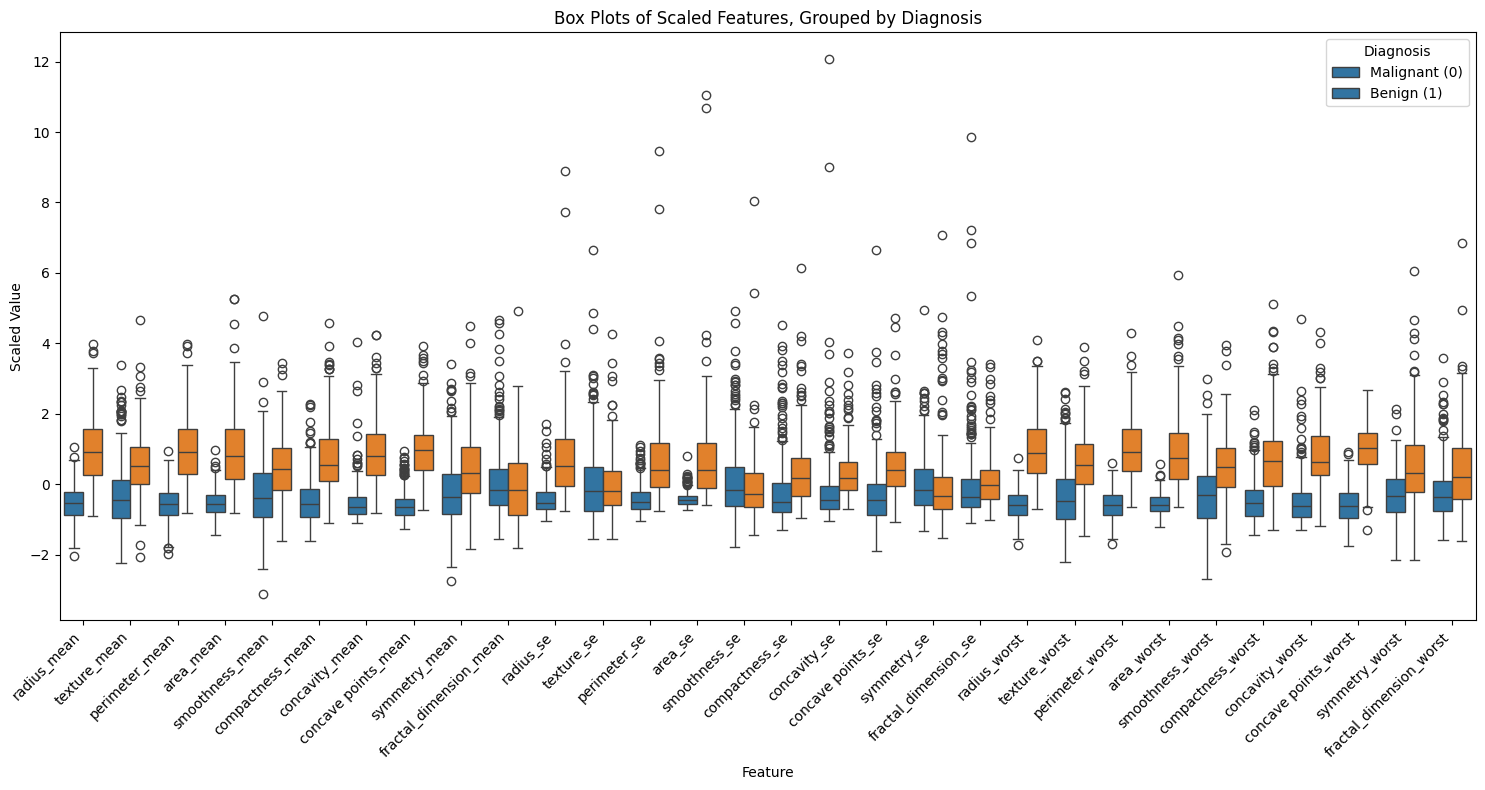

In [ ]:
# Step 1 & 2 - download and read the dataset into a Pandas data frame.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
import seaborn as sns

dataset = pd.read_csv('data.csv')
data_refined = pd.read_csv('data_refined.csv')

# Removed the Column Unmaned 32, as it was empty, and if we did the dropna on rows, all the rows would have been removed
dataset.drop('Unnamed: 32', axis=1, inplace=True)  # Unnamed column is empty, all 569 rows, axis=1 means Column wise, not row.
dataset.dropna(inplace = True)
#print(dataset.isna().sum())

# Step 3 
dataset.drop('id', axis=1, inplace=True)  # Also dont need the ID Attribute as it has no useful data.
#print(dataset.head(10))

# Step 4  Encode 'M' (Malignant) and 'B' (Benign) to numerical labels (0 or 1) for Y
# Separate the data for X and y
X = dataset.drop('diagnosis', axis=1,)
y = dataset['diagnosis']
# ENcode M = 0 and B = 1
label_encoder_y= LabelEncoder()
y_encoded = label_encoder_y.fit_transform(y)
# Scaling on X (between a value of 0 and 1)
X_scaled_array = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns=X.columns)
print (X_scaled)
# Output results to date_refined.csv
X_scaled.to_csv('data_refined.csv', index=False)

# Step 5 -- Visualization using Seaborn
# Convert y_encoded back to DataFrame for easy combination and plot labeling
y_df = pd.DataFrame(y_encoded, columns=['diagnosis_encoded'])
# Re-combine the scaled features and the encoded target
data_for_viz = pd.concat([X_scaled.reset_index(drop=True), y_df], axis=1)

# -- Visualization Set 1: Pair Plots for the features
plt.figure(figsize=(6, 5))
sns.countplot(x='diagnosis_encoded', data=data_for_viz)
plt.title('Diagnosis')
plt.xlabel('Diagnosis (0: Malignant, 1: Benign)')
plt.ylabel('Count')
plt.show()

# -- Visualization Set 2: Correlation Matrix heat map 
plt.figure(figsize=(18, 15))
# Calculate the correlation matrix for all features (excluding the encoded target for X features correlation)
corr_matrix = X_scaled.corr()
# Create the heat map
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()

# --- Visualization Set 3: Box Plots for the features
features_to_plot = X_scaled.columns[:]
data_subset = data_for_viz[features_to_plot.tolist() + ['diagnosis_encoded']]

data_melted = pd.melt(data_subset, id_vars="diagnosis_encoded", var_name="Feature", value_name="Scaled Value")

plt.figure(figsize=(15, 8))
sns.boxplot(x="Feature", y="Scaled Value", hue="diagnosis_encoded", data=data_melted)
plt.title('Box Plots of Scaled Features, Grouped by Diagnosis')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Diagnosis', labels=['Malignant (0)', 'Benign (1)'])
plt.tight_layout()
plt.show()



